# 🍷 Wine Quality Classification (Red)

Dataset dari `openml` – tujuan kita adalah memprediksi apakah kualitas wine merah **buruk** (<6) atau **baik** (≥6). Kita sengaja mulai tanpa preprocessing/tuning agar hasil awal kurang bagus, dan bisa ditingkatkan bertahap.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%matplotlib inline

In [18]:
# Load dataset dan simpan salinan
wine = fetch_openml(name='wine-quality-red', version=1, as_frame=True)
df = wine.frame
df_raw = df.copy()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0, 0.5, 'Jumlah Sampel')

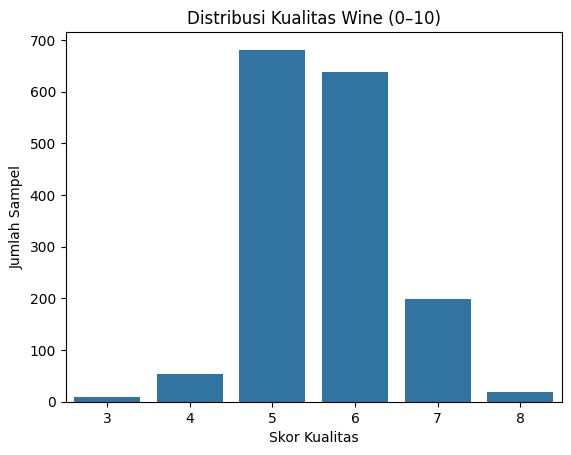

In [19]:
# Visualisasi distribusi kelas original (0–10)
sns.countplot(x=df['class'])
plt.title('Distribusi Kualitas Wine (0–10)')
plt.xlabel('Skor Kualitas')
plt.ylabel('Jumlah Sampel')

In [20]:
# Binarisasi target: <6 = buruk (0), >=6 = bagus (1)
df['target'] = (df['class'].astype(int) >= 6).astype(int)
df['target'].value_counts()

target
1    855
0    744
Name: count, dtype: int64

In [21]:
# Pisahkan fitur dan target
X = df.drop(['target'], axis=1)
y = df['target']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       171

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

